In [4]:
import pandas as pd
import numpy as np
df= pd.read_csv("/content/Housing.csv")
df.info()
df.shape
df.columns
df.head()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [21]:
#task2
#missing values
print("missing values:")
print(df.isnull().sum())
# to differentiate between missng and duplicate values
print("")
# duplicate rows
print("duplicate rows:")
print(df.duplicated().sum())

#one-hot encoding
df_cleaned = pd.get_dummies(df,drop_first=True)
print("data after doing onehot encoding ")
print(df_cleaned.head())
#checking missing values after doing one-hot encoding
df.isnull().sum()

missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

duplicate rows:
0
data after doing onehot encoding 
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False     

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [23]:
#task3
import seaborn as sns
import matplotlib.pyplot as plt
#correlation matrix to indefiy linear relationships
correlation = df.corr(numeric_only = True)['price'].sort_values(ascending=False)
print("correlation of each column with price:")
print(correlation)

correlation of each column with price:
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


In [27]:
#tasl4
#model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df_cleaned.drop('price',axis = 1) # input futures
y = df_cleaned['price'] #target vairable

# train data = 80 percent and test data = 20 percent
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =42)

#evaluate model
model  = LinearRegression()
model.fit(x_train,y_train)
'''
the folling loop moves through the features and
regression coefficients to show how much that future influences the target predection
'''
print("model evaluation")
for feature ,coef in zip(x.columns,model.coef_):
  print(f"{feature}: {coef}")

model evaluation
area: 235.9688045413957
bedrooms: 76778.7016343784
bathrooms: 1094444.7861005957
stories: 407476.59498491115
parking: 224841.91327662673
mainroad_yes: 367919.9476795722
guestroom_yes: 231610.0371756495
basement_yes: 390251.17618109327
hotwaterheating_yes: 684649.8853387912
airconditioning_yes: 791426.7358431868
prefarea_yes: 629890.5653133605
furnishingstatus_semi-furnished: -126881.81758510851
furnishingstatus_unfurnished: -413645.062228222


In [28]:
#task5
#model evaluation
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"mean squared error:  {mse:.2f}")
print(f"R-squared score: {r2:.4f}")

mean squared error:  1754318687330.66
R-squared score: 0.6529


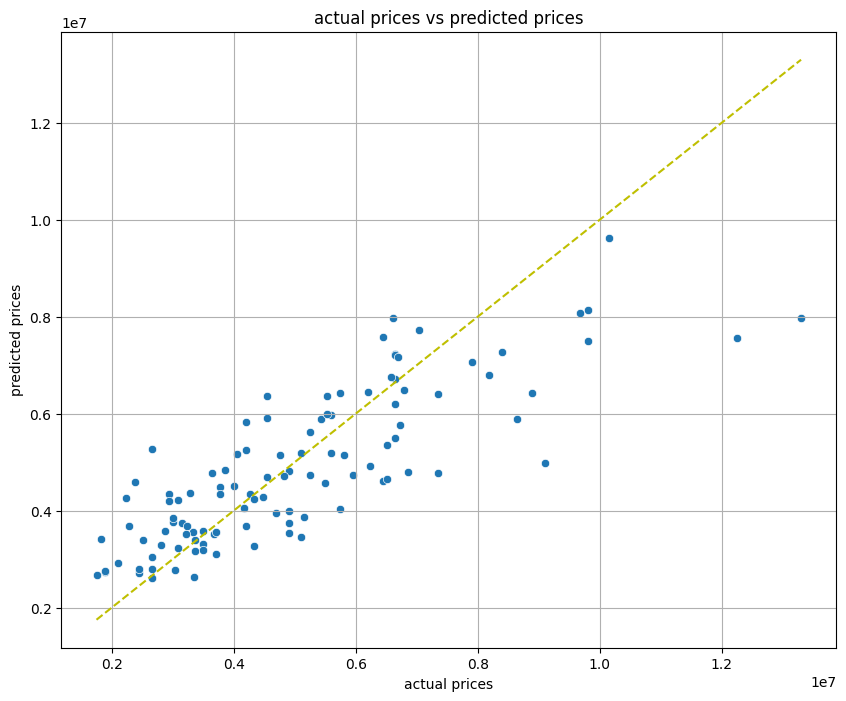

In [30]:
#task6
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test,y =y_pred)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], '--y')
plt.grid(True)
plt.show()